In [92]:
# read packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
# importing data
acs_raw = pd.read_excel('/content/drive/My Drive/KPMG #2 (NYC) - Realizing Gender Equality in the Workplace: Unemployment by Geography/USE THIS DATA ONLY (2021) FOR NOW/ACS 2021 Sociodemographics by Sex.xlsx', header=0)
acs_raw.head()
print(acs_raw.shape) # check shape
acs_raw.head() # view

(33774, 315)


,zcta5,pop,male,male_under_5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,...,hins_female_45_54_no_health_ins,hins_female_55_64,hins_female_55_64_health_ins,hins_female_55_64_no_health_ins,hins_female_65_74,hins_female_65_74_health_ins,hins_female_65_74_no_health_ins,hins_female_75_over,hins_female_75_over_health_ins,hins_female_75_over_no_health_ins
0,601,17126,8451,331,456,533,311,242,145,38,...,79,1301,1234,67,1031,1031,0,785,785,0
1,602,37895,18588,639,941,998,681,471,309,346,...,93,3092,2904,188,2357,2342,15,1745,1737,8
2,603,49136,23817,944,1087,1531,999,730,339,302,...,263,3583,3350,233,3376,3308,68,2653,2653,0
3,606,5751,2817,113,117,138,107,63,124,20,...,1,438,417,21,393,373,20,332,332,0
4,610,26153,12678,424,725,637,493,322,124,142,...,0,1911,1716,195,1634,1634,0,1362,1362,0


In [95]:
## Filter to only NYC zip codes
# read in zip code; extract the zip codes
nyc_zipcode = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/nyc-housing/master/Data/nyc-zip-codes.csv')
nyc_zipcode.head()

,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


In [96]:
acs_nyc = acs_raw[acs_raw.zcta5.isin(nyc_zipcode.ZipCode.unique())].reset_index(drop=True)
acs_nyc = acs_nyc.merge(nyc_zipcode[['ZipCode', 'Borough']], left_on='zcta5', right_on='ZipCode', how='inner') # want to add the borough column so trying to join both tables on zipcode
acs_nyc = acs_nyc.drop('ZipCode', axis=1)

# check; must have same number of rows for acs_nyc and number of nyc zip codes.
print(acs_nyc.shape, nyc_zipcode.shape)

(177, 316) (178, 3)


In [97]:
## one more acs missing one nyc zip code ... which one is it?
for i in nyc_zipcode.ZipCode.unique():
    if i in acs_nyc.zcta5.unique():
        pass
    else:
        print(i)


# 11695 is the missing zip code; it is Queens, Rockaways, 11695. Google search shows that no one lives here.
# reference: https://www.zipcodestogo.com/Far%20Rockaway/NY/11695/
# this makes sense so I'm going to go ahead and use this ...

11695


In [98]:
acs_nyc.head()

,zcta5,pop,male,male_under_5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,...,hins_female_55_64,hins_female_55_64_health_ins,hins_female_55_64_no_health_ins,hins_female_65_74,hins_female_65_74_health_ins,hins_female_65_74_no_health_ins,hins_female_75_over,hins_female_75_over_health_ins,hins_female_75_over_no_health_ins,Borough
0,10001,26966,12570,485,555,356,102,200,93,167,...,1414,1361,53,834,834,0,948,948,0,Manhattan
1,10002,76807,38640,1261,1867,1955,896,568,403,595,...,5251,5004,247,4972,4888,84,4420,4115,305,Manhattan
2,10003,54447,27219,902,647,427,205,2875,698,434,...,2516,2418,98,2530,2530,0,1540,1540,0,Manhattan
3,10004,4795,2539,338,93,83,5,7,0,0,...,188,188,0,88,88,0,2,2,0,Manhattan
4,10005,8637,3880,140,43,39,30,0,154,0,...,176,176,0,34,34,0,0,0,0,Manhattan


In [99]:
## change format
acs_nyc['zcta5'] = acs_nyc['zcta5'].astype('str')

In [100]:
# check the columns; read through to select only the necessary columns for the exercise
for i in acs_nyc.columns:
    print("'"+i+"',")

'zcta5',
'pop',
'male',
'male_under_5',
'male_5_9',
'male_10_14',
'male_15_17',
'male_18_19',
'male_20',
'male_21',
'male_22_24',
'male_25_29',
'male_30_34',
'male_35_39',
'male_40_44',
'male_45_49',
'male_50_54',
'male_55_59',
'male_60_61',
'male_62_64',
'male_65_66',
'male_67_69',
'male_70_74',
'male_75_79',
'male_80_84',
'male_85_over',
'female',
'female_under_5',
'female_5_9',
'female_10_14',
'female_15_17',
'female_18_19',
'female_20',
'female_21',
'female_22_24',
'female_25_29',
'female_30_34',
'female_35_39',
'female_40_44',
'female_45_49',
'female_50_54',
'female_55_59',
'female_60_61',
'female_62_64',
'female_65_66',
'female_67_69',
'female_70_74',
'female_75_79',
'female_80_84',
'female_85_over',
'educ_sex_pop',
'educ_male_pop',
'educ_male_none',
'educ_male_4th',
'educ_male_6th',
'educ_male_8th',
'educ_male_9th',
'educ_male_10th',
'educ_male_11th',
'educ_male_12th',
'educ_male_high_school',
'educ_male_coll_1y',
'educ_male_coll_2y',
'educ_male_assoc',
'educ_male_bachelors',
'e

In [101]:
tmp = acs_nyc.copy() # make a copy just in case ...

In [102]:
# CREATE DEPENDENT VARIABLE:

# Unemployement rate for Male: sum of all unemplpyed male until 75 / all emplyed + unemplpoyed male
tmp['unemployement_rate_male'] = (tmp[['employment_male_16_19_unemployed','employment_male_20_21_unemployed','employment_male_22_24_unemployed', 'employment_male_25_29_unemployed', 'employment_male_30_34_unemployed', 'employment_male_35_44_unemployed', 'employment_male_45_54_unemployed', 'employment_male_55_59_unemployed', 'employment_male_60_61_unemployed','employment_male_62_64_unemployed','employment_male_65_69_unemployed','employment_male_70_74_unemployed','employment_male_75_over_unemployed']].sum(axis=1)) / ( tmp[['employment_male_16_19_unemployed','employment_male_20_21_unemployed','employment_male_22_24_unemployed', 'employment_male_25_29_unemployed', 'employment_male_30_34_unemployed', 'employment_male_35_44_unemployed', 'employment_male_45_54_unemployed', 'employment_male_55_59_unemployed', 'employment_male_60_61_unemployed','employment_male_62_64_unemployed','employment_male_65_69_unemployed','employment_male_70_74_unemployed','employment_male_75_over_unemployed']].sum(axis=1) + tmp[['employment_male_16_19_employed','employment_male_20_21_employed','employment_male_22_24_employed', 'employment_male_25_29_employed', 'employment_male_30_34_employed', 'employment_male_35_44_employed', 'employment_male_45_54_employed', 'employment_male_55_59_employed', 'employment_male_60_61_employed','employment_male_62_64_employed','employment_male_65_69_employed','employment_male_70_74_employed','employment_male_75_over_employed']].sum(axis=1) )


# Unemployment rate for Female:
tmp['unemployement_rate_female'] = (tmp[['employment_female_16_19_unemployed','employment_female_20_21_unemployed','employment_female_22_24_unemployed', 'employment_female_25_29_unemployed', 'employment_female_30_34_unemployed', 'employment_female_35_44_unemployed', 'employment_female_45_54_unemployed', 'employment_female_55_59_unemployed', 'employment_female_60_61_unemployed','employment_female_62_64_unemployed','employment_female_65_69_unemployed','employment_female_70_74_unemployed','employment_female_75_over_unemployed']].sum(axis=1)) / (tmp[['employment_female_16_19_unemployed','employment_female_20_21_unemployed','employment_female_22_24_unemployed', 'employment_female_25_29_unemployed', 'employment_female_30_34_unemployed', 'employment_female_35_44_unemployed', 'employment_female_45_54_unemployed', 'employment_female_55_59_unemployed', 'employment_female_60_61_unemployed','employment_female_62_64_unemployed','employment_female_65_69_unemployed','employment_female_70_74_unemployed','employment_female_75_over_unemployed']].sum(axis=1) + tmp[['employment_female_16_19_employed','employment_female_20_21_employed','employment_female_22_24_employed', 'employment_female_25_29_employed', 'employment_female_30_34_employed', 'employment_female_35_44_employed', 'employment_female_45_54_employed', 'employment_female_55_59_employed', 'employment_female_60_61_employed','employment_female_62_64_employed','employment_female_65_69_employed','employment_female_70_74_employed','employment_female_75_over_employed']].sum(axis=1) )


In [103]:
# CREATE INDEPENDENT VARIABLES BELOW .....

In [104]:
# independent variable 1: Concentration (proportion) of Male

## 1. adult male population
tmp['male_adult'] = tmp[['male_18_19','male_20','male_21','male_22_24','male_25_29','male_30_34', 'male_35_39','male_40_44','male_45_49','male_50_54','male_55_59','male_60_61','male_62_64']].sum(axis=1)

tmp['male_adult_perc'] = tmp['male_adult'] / tmp['pop'] # concentration of men in total population


In [105]:
# independent variable 2: Concentration (proportion) of Female

## 2. adult female population
tmp['female_adult'] = tmp [['female_18_19','female_20','female_21','female_22_24','female_25_29','female_30_34',
'female_35_39','female_40_44','female_45_49','female_50_54','female_55_59','female_60_61','female_62_64',]].sum(axis=1) # row-wise sum

tmp['female_adult_perc'] = tmp['female_adult'] / tmp['pop'] # concentration of women in total population

In [106]:
# independent variable 3: Health Insurance in percentages Male

# creating new column which contains both male and female hins population to form total population hins
tmp['hins_adult_pop'] = tmp[['hins_female_19_25', 'hins_female_26_34', 'hins_female_35_44', 'hins_female_45_54', 'hins_female_55_64', 'hins_male_19_25', 'hins_male_26_34', 'hins_male_35_44', 'hins_male_45_54', 'hins_male_55_64']].sum(axis=1)

# adult male insured population
tmp['hins_adult_male_health_ins'] = tmp[['hins_male_19_25_health_ins', 'hins_male_26_34_health_ins', 'hins_male_35_44_health_ins', 'hins_male_45_54_health_ins', 'hins_male_55_64_health_ins']].sum(axis=1)

# adult male uninsured population
tmp['hins_adult_male_no_health_ins'] = tmp[['hins_male_19_25_no_health_ins', 'hins_male_26_34_no_health_ins', 'hins_male_35_44_no_health_ins', 'hins_male_45_54_no_health_ins','hins_male_55_64_no_health_ins']].sum(axis=1)

# create column that tells us the proportion of adult male insured from total population (percentages)
tmp['hins_adult_male_health_ins_perc'] = tmp['hins_adult_male_health_ins'] / tmp['hins_adult_pop'] # of total population surveyed about insurance

# create column which tells us proportion of adult male who don't have health insurance from total population (percentages)
tmp['hins_adult_male_no_health_ins_perc'] = tmp['hins_adult_male_no_health_ins'] / tmp['hins_adult_pop'] # of total population surveyed about health insurance

In [107]:
# independent variable 4: Health Insurance in percentages Female

# adult women insured population
tmp['hins_adult_female_health_ins'] = tmp[['hins_female_19_25_health_ins', 'hins_female_26_34_health_ins', 'hins_female_35_44_health_ins', 'hins_female_45_54_health_ins','hins_female_55_64_health_ins']].sum(axis=1)

# adult women uninsured population
tmp['hins_adult_female_no_health_ins'] = tmp[['hins_female_19_25_no_health_ins', 'hins_female_26_34_no_health_ins', 'hins_female_35_44_no_health_ins', 'hins_female_45_54_no_health_ins', 'hins_female_55_64_no_health_ins']].sum(axis=1)

# create column for the proportion of insured women from total popualtion surveyed about their insurance status (percentages)
tmp['hins_adult_female_health_ins_perc'] = tmp['hins_adult_female_health_ins'] / tmp['hins_adult_pop']

# create column for the proportion of uninsured women from total popualtion surveyed about their insurance status (percentages)
tmp['hins_adult_female_no_health_ins_perc'] = tmp['hins_adult_female_no_health_ins'] / tmp['hins_adult_pop']


In [108]:
# independent variable 5: Education concentration (proportion) of adults

# adult male education population
tmp['educ_male_adult'] = tmp[['educ_male_none', 'educ_male_4th', 'educ_male_6th', 'educ_male_8th', 'educ_male_9th', 'educ_male_10th', 'educ_male_11th', 'educ_male_12th', 'educ_male_high_school', 'educ_male_coll_1y', 'educ_male_coll_2y', 'educ_male_assoc', 'educ_male_bachelors',
                              'educ_male_masters', 'educ_male_prof', 'educ_male_phd']].sum(axis=1) # row-wise sum

# adult female education population
tmp['educ_female_adult'] = tmp[['educ_female_none', 'educ_female_4th', 'educ_female_6th', 'educ_female_8th', 'educ_female_9th', 'educ_female_10th', 'educ_female_11th', 'educ_female_12th', 'educ_female_high_school', 'educ_female_high_school', 'educ_female_coll_1y', 'educ_female_coll_2y', 'educ_female_assoc', 'educ_female_bachelors',
                              'educ_female_masters', 'educ_female_prof', 'educ_female_phd']].sum(axis=1) # row-wise sum

#  adult education population
tmp['educ_adult_pop'] = tmp[['educ_male_adult', 'educ_female_adult']].sum(axis=1)

In [109]:
# independent variable 6: Education concentration (proportion) of adults with under high school education

# create a new column that gives the proportion of male adult under high school to total population
tmp['educ_male_under_high_school_perc'] = (tmp['educ_male_none'] + tmp['educ_male_4th'] + tmp['educ_male_6th'] + tmp['educ_male_8th']) / tmp['educ_male_adult']
tmp['educ_male_under_high_school_perc']

# create a new column that gives the proportion of female adult under high school to total population
tmp['educ_female_under_high_school_perc'] = (tmp['educ_female_none'] + tmp['educ_female_4th'] + tmp['educ_female_6th'] + tmp['educ_female_8th']) / tmp['educ_female_adult']
tmp['educ_female_under_high_school_perc']

# create a new column that gives the proportion of adult under high school to total population
tmp['educ_adult_under_high_school_perc'] = (tmp['educ_male_none'] + tmp['educ_male_4th'] + tmp['educ_male_6th'] + tmp['educ_male_8th'] + tmp['educ_female_none'] + tmp['educ_female_4th'] + tmp['educ_female_6th'] + tmp['educ_female_8th']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_under_high_school_perc']

0      0.030317
1      0.160995
2      0.025581
3      0.003305
4      0.000853
         ...   
172    0.089075
173    0.085625
174    0.073364
175    0.038973
176    0.000000
Name: educ_adult_under_high_school_perc, Length: 177, dtype: float64

In [110]:
# independent variable 7: Education concentration (proportion) of adults with some high school education

# create a new column that gives the proportion of male adult with some high school to total population
tmp['educ_male_some_high_school_perc'] = (tmp['educ_male_9th'] + tmp['educ_male_10th'] + tmp['educ_male_11th'] + tmp['educ_male_12th']) / tmp['educ_male_adult']
tmp['educ_male_some_high_school_perc']

# create a new column that gives the proportion of female adult with some high school to total population
tmp['educ_female_some_high_school_perc'] = (tmp['educ_female_9th'] + tmp['educ_female_10th'] + tmp['educ_female_11th'] + tmp['educ_female_12th']) / tmp['educ_female_adult']
tmp['educ_female_some_high_school_perc']

# create a new column that gives the proportion of adult with some high school to total population
tmp['educ_adult_some_high_school_perc'] = (tmp['educ_male_9th'] + tmp['educ_male_10th'] + tmp['educ_male_11th'] + tmp['educ_male_12th'] + tmp['educ_female_9th'] + tmp['educ_female_10th'] + tmp['educ_female_11th'] + tmp['educ_female_12th']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_some_high_school_perc']

0      0.038966
1      0.136554
2      0.009847
3      0.000275
4      0.000000
         ...   
172    0.083039
173    0.069678
174    0.073904
175    0.055739
176    0.038345
Name: educ_adult_some_high_school_perc, Length: 177, dtype: float64

In [111]:
# independent variable 8: Education concentration (proportion) of adults with high school diploma

# create a new column that gives the proportion of male adult high school graduates (highest degree) to total population
tmp['educ_male_high_school_perc'] = tmp['educ_male_high_school'] / tmp['educ_male_adult']
tmp['educ_male_high_school_perc']

# create a new column that gives the proportion of female adult high school graduates (highest degree) to total population
tmp['educ_female_high_school_perc'] = tmp['educ_female_high_school'] / tmp['educ_female_adult']
tmp['educ_female_high_school_perc']

# create a new column that gives the proportion of adult high school graduates to total population
tmp['educ_adult_high_school_perc'] = (tmp['educ_male_high_school'] + tmp['educ_female_high_school']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_high_school_perc']

0      0.079778
1      0.165479
2      0.049885
3      0.006059
4      0.052587
         ...   
172    0.254632
173    0.256821
174    0.224233
175    0.215259
176    0.135553
Name: educ_adult_high_school_perc, Length: 177, dtype: float64

In [112]:
# independent variable 9: Education concentration (proportion) of adults with some college education

# create a new column that gives the proportion of male adult with some college (highest degree) to total population
tmp['educ_male_some_college_perc'] = (tmp['educ_male_coll_1y'] + tmp['educ_male_coll_2y']) / tmp['educ_male_adult']
tmp['educ_male_some_college_perc']

# create a new column that gives the proportion of female adult with some college (highest degree) to total population
tmp['educ_female_some_college_perc'] = (tmp['educ_female_coll_1y'] + tmp['educ_female_coll_2y']) / tmp['educ_female_adult']
tmp['educ_female_some_college_perc']

# create a new column that gives the proportion of adult with some college (highest degree) to total population
tmp['educ_adult_some_college_perc'] = (tmp['educ_male_coll_1y'] + tmp['educ_male_coll_2y'] + tmp['educ_female_coll_1y'] + tmp['educ_female_coll_2y']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_some_college_perc']

0      0.080139
1      0.087276
2      0.057284
3      0.015974
4      0.010233
         ...   
172    0.138786
173    0.164527
174    0.122243
175    0.141766
176    0.184326
Name: educ_adult_some_college_perc, Length: 177, dtype: float64

In [113]:
# independent variable 10: Education concentration (proportion) of adults with associates degree

# create a new column that gives the proportion of male adult assoc college graduates (highest degree) to total population
tmp['educ_male_assoc_perc'] = tmp['educ_male_assoc'] / tmp['educ_male_adult']
tmp['educ_male_assoc_perc']

# create a new column that gives the proportion of female adult assoc college graduates (highest degree) to total population
tmp['educ_female_assoc_perc'] = tmp['educ_female_assoc'] / tmp['educ_female_adult']
tmp['educ_female_assoc_perc']

# create a new column that gives the proportion of adult assoc college graduates to total population
tmp['educ_adult_assoc_perc'] = (tmp['educ_male_assoc']  + tmp['educ_female_assoc']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_assoc_perc']

0      0.028470
1      0.037148
2      0.030035
3      0.008813
4      0.007391
         ...   
172    0.067719
173    0.072401
174    0.080025
175    0.049417
176    0.096199
Name: educ_adult_assoc_perc, Length: 177, dtype: float64

In [114]:
# independent variable 11: Education concentration (proportion) of adults with bachelors degree

# create a new column that gives the proportion of male adult bachelor college graduates (highest degree) to total population
tmp['educ_male_bachelor_perc'] = tmp['educ_male_bachelors'] / tmp['educ_male_adult']
tmp['educ_male_bachelor_perc']

# create a new column that gives the proportion of female adult bachelor college graduates (highest degree) to total population
tmp['educ_female_bachelor_perc'] = tmp['educ_female_bachelors'] / tmp['educ_female_adult']
tmp['educ_female_bachelor_perc']

# create a new column that gives the proportion of adult bachelor college graduates to total population
tmp['educ_adult_bachelor_perc'] = (tmp['educ_male_bachelors']  + tmp['educ_female_bachelors']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_bachelor_perc']

0      0.419073
1      0.235625
2      0.430082
3      0.530708
4      0.559977
         ...   
172    0.122463
173    0.140968
174    0.172293
175    0.212401
176    0.249580
Name: educ_adult_bachelor_perc, Length: 177, dtype: float64

In [115]:
# independent variable 12: Education concentration (proportion) of adults with advances degree (masters, prof, phd)

# create a new column that gives the proportion of male adult with advanced degrees (masters, professional, phd) to total population
tmp['educ_male_advanced_perc'] = (tmp['educ_male_masters'] + tmp['educ_male_prof'] + tmp['educ_male_phd']) / tmp['educ_male_adult']
tmp['educ_male_advanced_perc']

# create a new column that gives the proportion of female adult with advanced degrees (masters, professional, phd) to total population
tmp['educ_female_advanced_perc'] = (tmp['educ_female_masters'] + tmp['educ_female_prof'] + tmp['educ_female_phd']) / tmp['educ_female_adult']
tmp['educ_female_advanced_perc']

# create a new column that gives the proportion of adults with advanced degrees (masters, professional, phd) to total population
tmp['educ_adult_advanced_perc'] = (tmp['educ_male_masters'] + tmp['educ_male_prof'] + tmp['educ_male_phd'] + tmp['educ_female_masters'] + tmp['educ_female_prof'] + tmp['educ_female_phd']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_advanced_perc']

0      0.282580
1      0.100257
2      0.376472
3      0.432939
4      0.339540
         ...   
172    0.102691
173    0.090848
174    0.129175
175    0.191513
176    0.226707
Name: educ_adult_advanced_perc, Length: 177, dtype: float64

In [116]:
# SREEYA VARIABLES

In [117]:
#create total population for 18-19

tmp['total_18_19']= tmp[['male_18_19','female_18_19' ]].sum(axis=1)

#proportion for males 18-19

tmp['male_18_19_perc']= tmp['male_18_19'] / tmp['total_18_19']


In [118]:
#create total population for 18-19

tmp['total_18_19']= tmp[['male_18_19','female_18_19' ]].sum(axis=1)

#proportion for females 18-19


tmp['female_18_19_perc']= tmp['female_18_19'] / tmp['total_18_19']


In [119]:
#create total population for 20

tmp['total_20']= tmp[['male_20','female_20' ]].sum(axis=1)

#proportion for males 20


tmp['male_20_perc']= tmp['male_20'] / tmp['total_20']


In [120]:
#create total population for 20

tmp['total_20']= tmp[['male_20','female_20' ]].sum(axis=1)

#proportion for females 20


tmp['female_20_perc']= tmp['female_20'] / tmp['total_20']


In [121]:
#create total population for 21

tmp['total_21']= tmp[['male_21','female_21' ]].sum(axis=1)

#proportion for males 21


tmp['male_21_perc']= tmp['male_21'] / tmp['total_21']


In [122]:
#create total population for 21

tmp['total_21']= tmp[['male_21','female_21' ]].sum(axis=1)

#proportion for females 21


tmp['female_21_perc']= tmp['female_21'] / tmp['total_21']

In [123]:
#create total population for 22-24

tmp['total_22_24']= tmp[['male_22_24','female_22_24' ]].sum(axis=1)

#proportion for males 22-24


tmp['male_22_24_perc']= tmp['male_22_24'] / tmp['total_22_24']

In [124]:
#create total population for 22-24

tmp['total_22_24']= tmp[['male_22_24','female_22_24' ]].sum(axis=1)

#proportion for females 22-24


tmp['female_22_24_perc']= tmp['female_22_24'] / tmp['total_22_24']

In [125]:
#create total population for 25-29

tmp['total_25_29']= tmp[['male_25_29','female_25_29' ]].sum(axis=1)

#proportion for males 25-29

tmp['male_25_29_perc']= tmp['male_25_29'] / tmp['total_25_29']


In [126]:
#create total population for 25-29

tmp['total_25_29']= tmp[['male_25_29','female_25_29' ]].sum(axis=1)

#proportion for females 25-29


tmp['female_25_29_perc']= tmp['female_25_29'] / tmp['total_25_29']

In [127]:
#create total population for 30-34

tmp['total_30_34']= tmp[['male_30_34','female_30_34' ]].sum(axis=1)

#proportion for males 30-34


tmp['male_30_34_perc']= tmp['male_30_34'] / tmp['total_30_34']

In [128]:
#create total population for 30-34

tmp['total_30_34']= tmp[['male_30_34','female_30_34' ]].sum(axis=1)

#proportion for females 30-34


tmp['female_30_34_perc']= tmp['female_30_34'] / tmp['total_30_34']

In [129]:
#create total population for 35-39

tmp['total_35_39']= tmp[['male_35_39','female_35_39' ]].sum(axis=1)

#proportion for males 35-39


tmp['male_35_39_perc']= tmp['male_35_39'] / tmp['total_35_39']

In [130]:
#create total population for 35-39

tmp['total_35_39']= tmp[['male_35_39','female_35_39' ]].sum(axis=1)

#proportion for females 35-39


tmp['female_35_39_perc']= tmp['female_35_39'] / tmp['total_35_39']

In [131]:
#create total population for 40-44

tmp['total_40_44']= tmp[['male_40_44','female_40_44' ]].sum(axis=1)

#proportion for males 40-44


tmp['male_40_44_perc']= tmp['male_40_44'] / tmp['total_40_44']

In [132]:
#create total population for 40-44

tmp['total_40_44']= tmp[['male_40_44','female_40_44' ]].sum(axis=1)

#proportion for females 40-44


tmp['female_40_44_perc']= tmp['female_40_44'] / tmp['total_40_44']

In [133]:
#create total population for 45-49

tmp['total_45_49']= tmp[['male_45_49','female_45_49' ]].sum(axis=1)

#proportion for males 45-49

tmp['male_45_49_perc']= tmp['male_45_49'] / tmp['total_45_49']

In [134]:
#create total population for 45-49

tmp['total_45_49']= tmp[['male_45_49','female_45_49' ]].sum(axis=1)

#proportion for females 45-49


tmp['female_45_49_perc']= tmp['female_45_49'] / tmp['total_45_49']

In [135]:
#create total population for 50-54

tmp['total_50_54']= tmp[['male_50_54','female_50_54' ]].sum(axis=1)

#proportion for males 50-54


tmp['male_50_54_perc']= tmp['male_50_54'] / tmp['total_50_54']

In [136]:
#create total population for 50-54

tmp['total_50_54']= tmp[['male_50_54','female_50_54' ]].sum(axis=1)

#proportion for females 50-54


tmp['female_50_54_perc']= tmp['female_50_54'] / tmp['total_50_54']

In [137]:
#create total population for 55-59

tmp['total_55_59']= tmp[['male_55_59','female_55_59' ]].sum(axis=1)

#proportion for males 55-59

tmp['male_55_59_perc']= tmp['male_55_59'] / tmp['total_55_59']

In [138]:
#create total population for 55-59

tmp['total_55_59']= tmp[['male_55_59','female_55_59' ]].sum(axis=1)

#proportion for females 55-59

tmp['female_55_59_perc']= tmp['female_55_59'] / tmp['total_55_59']

In [139]:
#create total population for 60-61

tmp['total_60_61']= tmp[['male_60_61','female_60_61' ]].sum(axis=1)

#proportion for males 60-61

tmp['male_60_61_perc']= tmp['male_60_61'] / tmp['total_60_61']

In [140]:
#create total population for 60-61

tmp['total_60_61']= tmp[['male_60_61','female_60_61' ]].sum(axis=1)

#proportion for females 60-61

tmp['female_60_61_perc']= tmp['female_60_61'] / tmp['total_60_61']

In [141]:
#create total population for 62-64

tmp['total_62_64']= tmp[['male_62_64','female_62_64' ]].sum(axis=1)

#proportion for males 62-64

tmp['male_62_64_perc']= tmp['male_62_64'] / tmp['total_62_64']

In [142]:
#create total population for 62-64

tmp['total_62_64']= tmp[['male_62_64','female_62_64' ]].sum(axis=1)

#proportion for females 62-64

tmp['female_62_64_perc']= tmp['female_62_64'] / tmp['total_62_64']

In [143]:
#adult male in labor force
tmp['male_adult_labor_force'] = tmp[['employment_male_20_21_labor_force','employment_male_22_24_labor_force', 'employment_male_25_29_labor_force','employment_male_30_34_labor_force', 'employment_male_35_44_labor_force','employment_male_45_54_labor_force', 'employment_male_55_59_labor_force', 'employment_male_60_61_labor_force','employment_male_62_64_labor_force']].sum(axis=1)
#adult female in labor force
tmp['female_adult_labor_force'] = tmp[['employment_female_20_21_labor_force','employment_female_22_24_labor_force', 'employment_female_25_29_labor_force','employment_female_30_34_labor_force', 'employment_female_35_44_labor_force','employment_female_45_54_labor_force', 'employment_female_55_59_labor_force', 'employment_female_60_61_labor_force','employment_female_62_64_labor_force']].sum(axis=1)

In [144]:
#proportion of male labor force
tmp['male_adult_labor_force_%'] = tmp['male_adult_labor_force'] / tmp['employment_pop']
#proportion of female labor force
tmp['female_adult_labor_force_%'] = tmp['female_adult_labor_force'] / tmp['employment_pop']


In [145]:
# BAR GRAPHS BELOW...

In [146]:
#for presentation

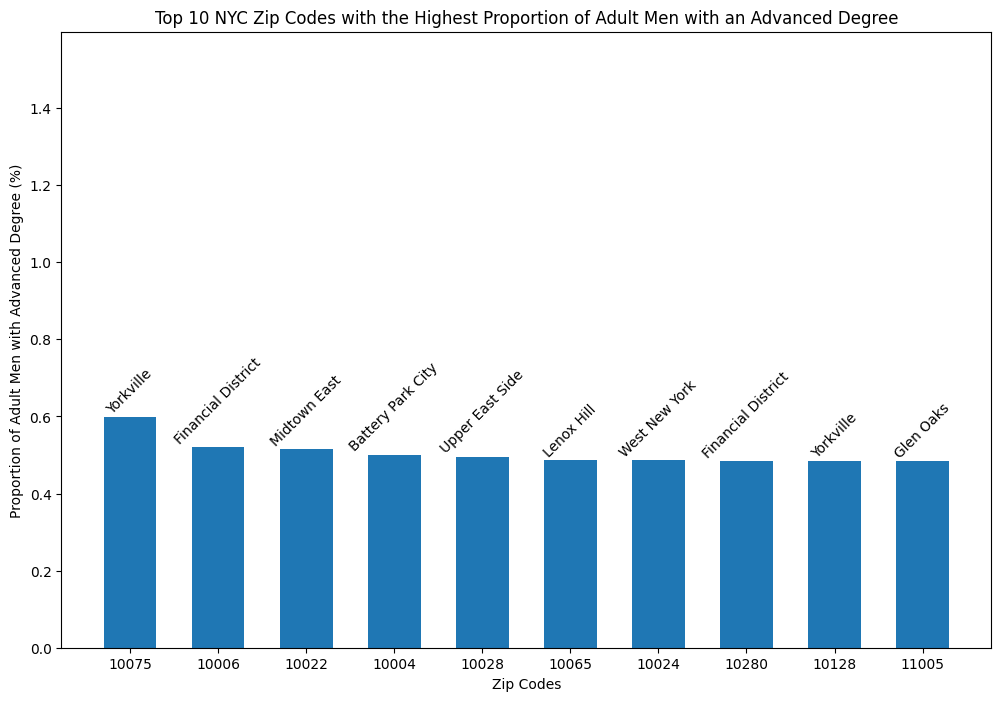

In [147]:
# Top 10 zip codes with the highest proportion of adult men with an advanced degree
top10_educ_men_bachelor = tmp.sort_values(by='educ_male_advanced_perc', ascending=False).head(n=10)

# Create a bar plot using Matplotlib for the top 10 zip codes with annotated neighborhood names
plt.figure(figsize=(12, 8))  # Adjust figure size for better spacing

# Plotting the bar graph
bars = plt.bar(x=top10_educ_men_bachelor['zcta5'], height=top10_educ_men_bachelor['educ_male_advanced_perc'],
               width=0.6, align='center')  # Adjust width for better bar separation

plt.title('Top 10 NYC Zip Codes with the Highest Proportion of Adult Men with an Advanced Degree')
plt.xlabel('Zip Codes')
plt.ylabel('Proportion of Adult Men with Advanced Degree (%)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually annotate bars with slanted neighborhood names
neighborhood_labels = [
    'Yorkville',
    'Financial District',
    'Midtown East',
    'Battery Park City',
    'Upper East Side',
    'Lenox Hill',
    'West New York',
    'Financial District',
    'Yorkville',
    'Glen Oaks'
]

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             neighborhood_labels[i],
             ha='center', color='black', fontsize=10, rotation=45)  # Slant annotations for readability

# Adjust y-axis limits to provide space for annotations
plt.ylim(0, max(top10_educ_men_bachelor['educ_male_advanced_perc']) + 1)  # Increase space for annotations

plt.show()


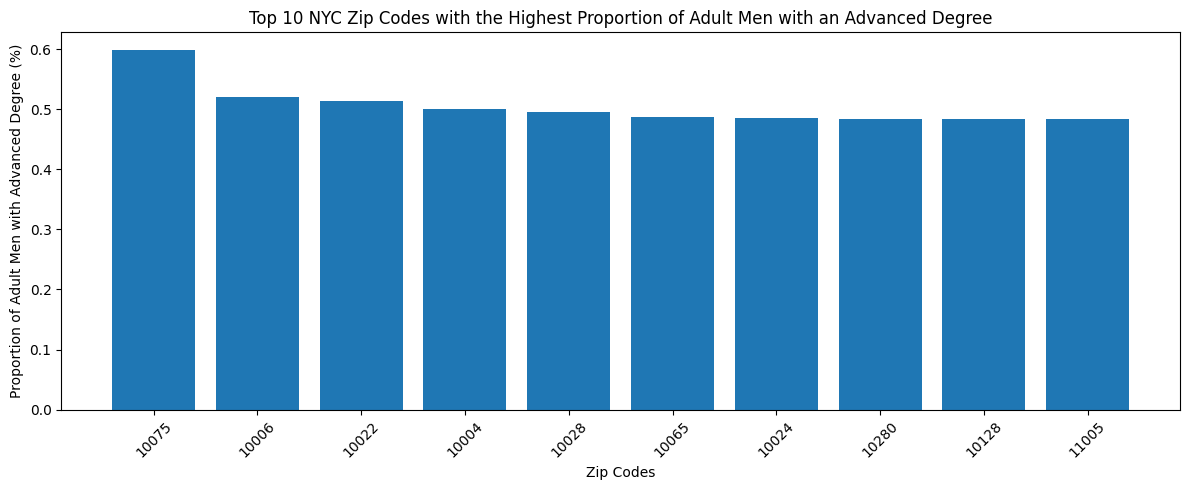

In [148]:
# top 15 zipcodes in NYC that have the highest proportion of college graduated adult men

top15_educ_men_bachelor = tmp.sort_values(by='educ_male_advanced_perc', ascending=False).head(n=10)

# Create a bar plot using Matplotlib for the top 15 zip codes
plt.figure(figsize=(12, 5))
plt.bar(x=top15_educ_men_bachelor['zcta5'], height=top15_educ_men_bachelor['educ_male_advanced_perc'])
plt.title('Top 10 NYC Zip Codes with the Highest Proportion of Adult Men with an Advanced Degree')
plt.xlabel('Zip Codes')
plt.ylabel('Proportion of Adult Men with Advanced Degree (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


10075: Yorkville, Manhattan

10006: Financial District, Manhattan

10022: Midtown East, Mnahttan

10004: Battery Park City, Manhattan

10028: Upper East Side, Manhttan

10065: Lenox Hill, Manhttan

10024: West New York, Manhttan

10280: Financial District, Manhttan

10128: Yorkville, Manhttan

11005: Glen Oaks, Queens

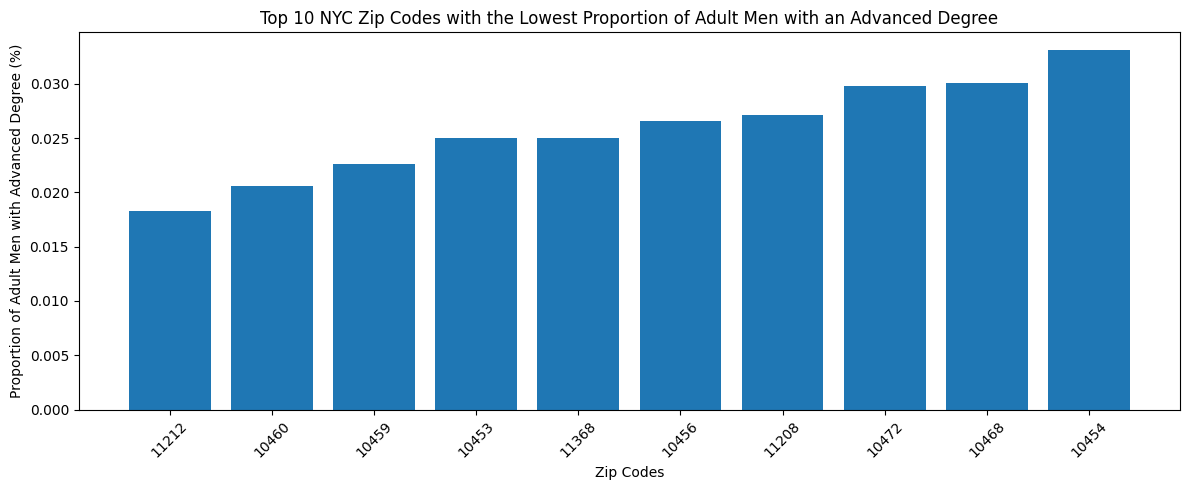

In [149]:
# top 15 zipcodes in NYC that have the highest proportion of college graduated adult men

bottom15_educ_men_bachelor = tmp.sort_values(by='educ_male_advanced_perc', ascending=True).head(n=10)

# Create a bar plot using Matplotlib for the top 15 zip codes
plt.figure(figsize=(12, 5))
plt.bar(x=bottom15_educ_men_bachelor['zcta5'], height=bottom15_educ_men_bachelor['educ_male_advanced_perc'])
plt.title('Top 10 NYC Zip Codes with the Lowest Proportion of Adult Men with an Advanced Degree')
plt.xlabel('Zip Codes')
plt.ylabel('Proportion of Adult Men with Advanced Degree (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


11212: Brownsville, Brooklyn

10460: West Bronx, The Bronx

10459: Hunts Point, The Bronx

10453: West Bronx, The Bronx

11368: Corona, Queens

10456: Morrisania, The Bronx

11208: East New York, Brooklyn

10472: 	Soundview Bruckner

10468: Jerome Park, The Bronx

10454: Mott Haven, The Bronx

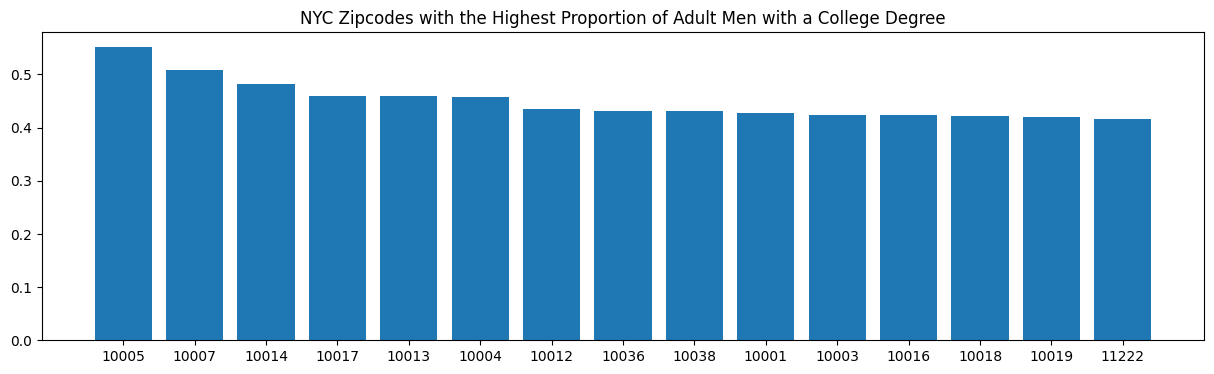

In [150]:
# top 15 zipcodes in NYC that have the highest proportion of college graduated adult men
top15_educ_men_bachelor = tmp.sort_values(by = 'educ_male_bachelor_perc', ascending=False).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_educ_men_bachelor.zcta5.values, height = top15_educ_men_bachelor.educ_male_bachelor_perc)
plt.title('NYC Zipcodes with the Highest Proportion of Adult Men with a College Degree')
plt.show()

10004: Bowling Green

10005: Financial District

10017: Murray Hill

10280: Battery Park City

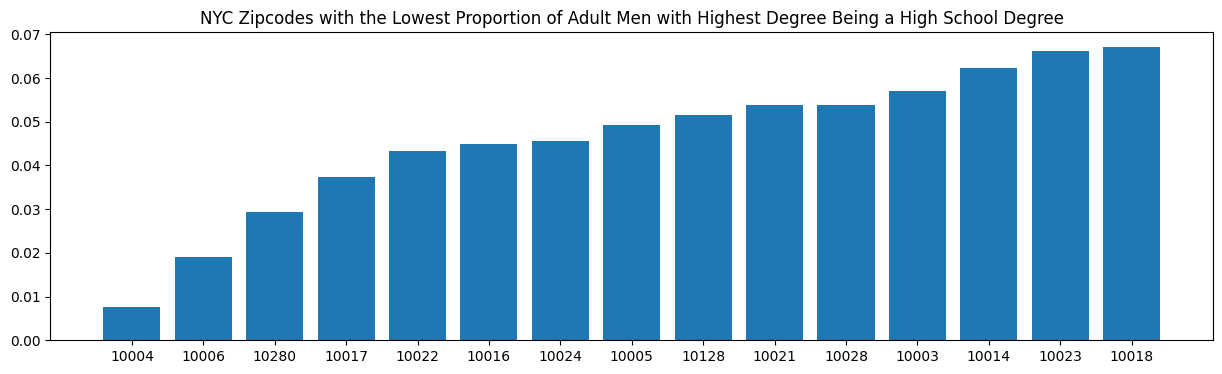

In [151]:
# top 15 NYC Zipcodes with the Lowest Proportion of Adult Men with Highest Degree Being a High School Degree
top15_educ_men_high_school = tmp.sort_values(by = 'educ_male_high_school_perc', ascending=True).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_educ_men_high_school.zcta5.values, height = top15_educ_men_high_school.educ_male_high_school_perc)
plt.title('NYC Zipcodes with the Lowest Proportion of Adult Men with Highest Degree Being a High School Degree')
plt.show()

There is overlap with a few of the zipcodes, including 10004, 10280, 10028, and more. It makes sense that the lowest proportion of male adults whos highest degree is a high school degree matches the zipcodes of the highest proportion of male adults with a college degree and higher

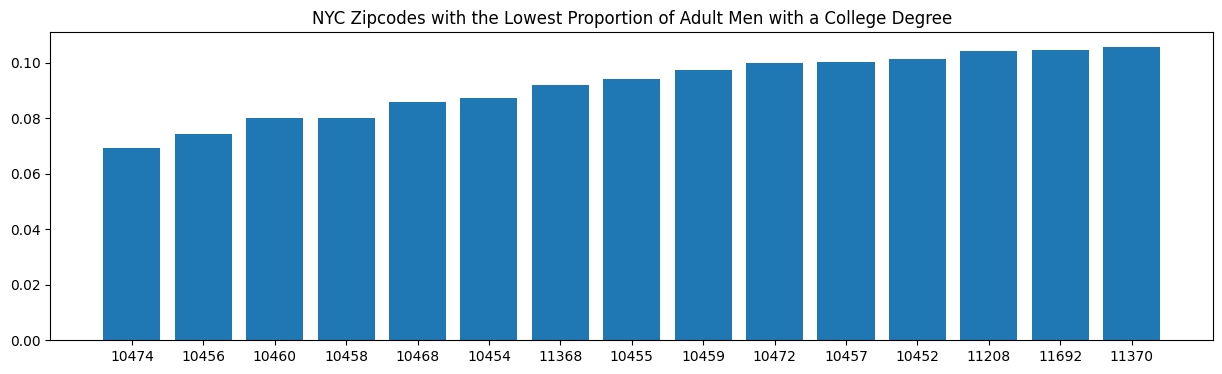

In [152]:
# top 15 zipcodes in NYC that have the lowest proportion of college graduated adult men
bottom15_educ_men_bachelor = tmp.sort_values(by = 'educ_male_bachelor_perc', ascending=True).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = bottom15_educ_men_bachelor.zcta5.values, height = bottom15_educ_men_bachelor.educ_male_bachelor_perc)
plt.title('NYC Zipcodes with the Lowest Proportion of Adult Men with a College Degree')
plt.show()

11208: Kings County, Brooklyn

10460: Bronx Park South

10456: Morrisania, The Bronx

10468: Jerome Park, The Bronx

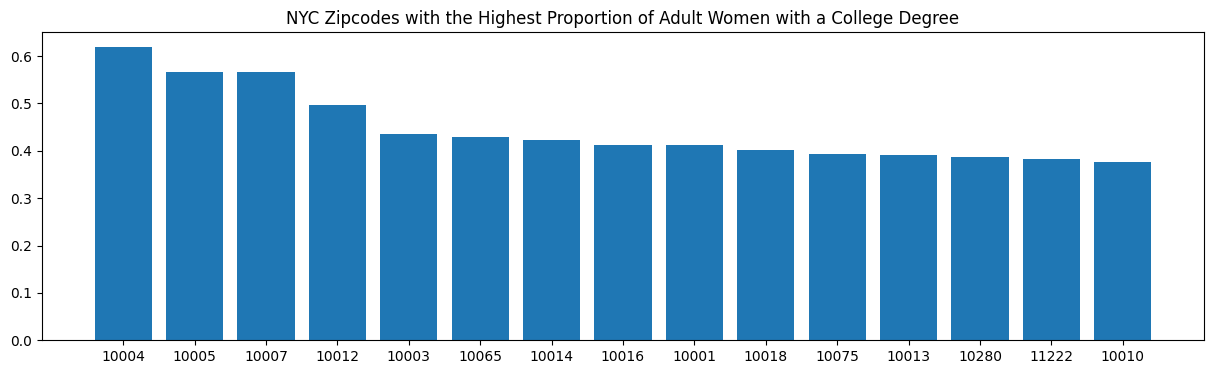

In [153]:
# top 15 zipcodes in NYC that have the highest proportion of college graduated adult women
top15_educ_female_bachelor = tmp.sort_values(by = 'educ_female_bachelor_perc', ascending=False).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_educ_female_bachelor.zcta5.values, height = top15_educ_female_bachelor.educ_female_bachelor_perc)
plt.title('NYC Zipcodes with the Highest Proportion of Adult Women with a College Degree')
plt.show()

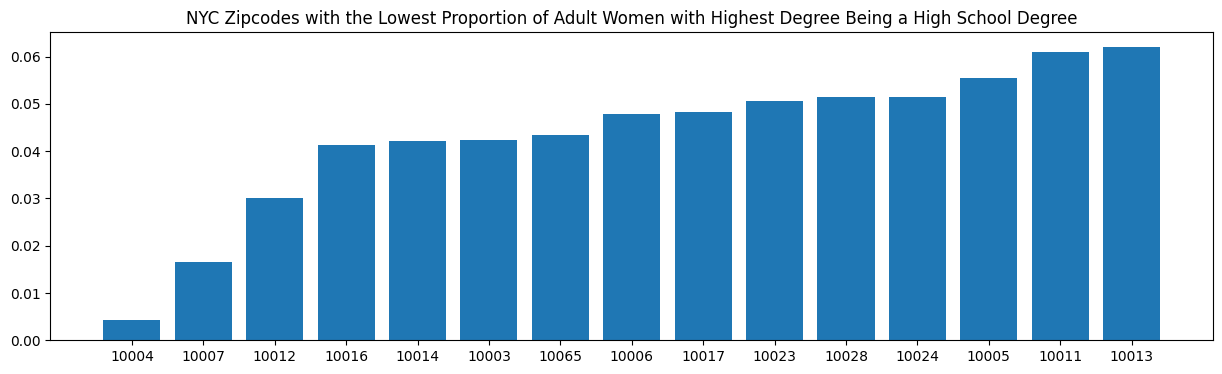

In [154]:
# top 15 NYC Zipcodes with the Lowest Proportion of Adult Women with Highest Degree Being a High School Degree
top15_educ_female_high_school = tmp.sort_values(by = 'educ_female_high_school_perc', ascending=True).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_educ_female_high_school.zcta5.values, height = top15_educ_female_high_school.educ_female_high_school_perc)
plt.title('NYC Zipcodes with the Lowest Proportion of Adult Women with Highest Degree Being a High School Degree')
plt.show()


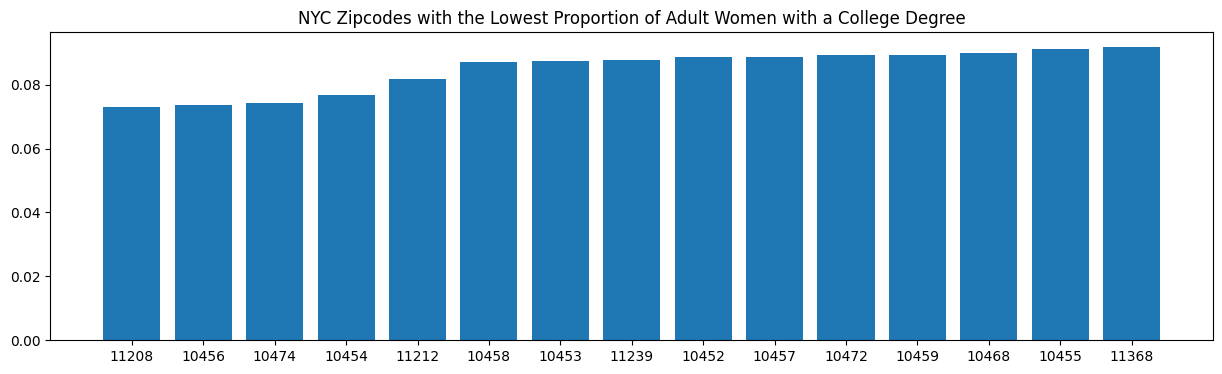

In [155]:
# top 15 zipcodes in NYC that have the lowest proportion of college graduated adult women
bottom15_educ_female_bachelor = tmp.sort_values(by = 'educ_female_bachelor_perc', ascending=True).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = bottom15_educ_female_bachelor.zcta5.values, height = bottom15_educ_female_bachelor.educ_female_bachelor_perc)
plt.title('NYC Zipcodes with the Lowest Proportion of Adult Women with a College Degree')
plt.show()

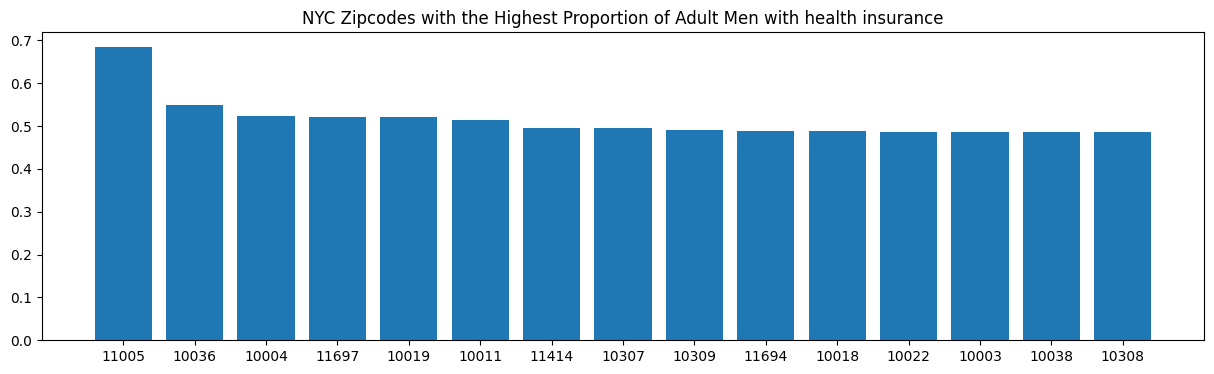

In [156]:
# top 15 zipcodes in NYC that have the highest amount/ proportion of insured adult men
top15_men_health_ins = tmp.sort_values(by = 'hins_adult_male_health_ins_perc', ascending=False).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_men_health_ins.zcta5.values, height = top15_men_health_ins.hins_adult_male_health_ins_perc)
plt.title('NYC Zipcodes with the Highest Proportion of Adult Men with health insurance')
plt.show()

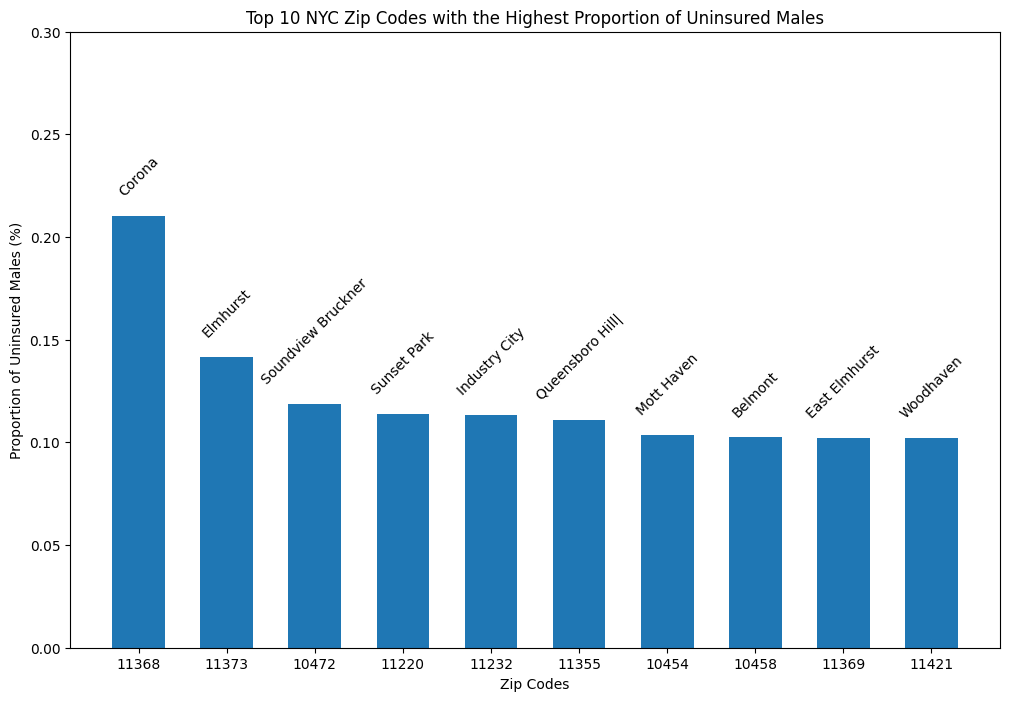

In [203]:


# create a bar graph to illustrate the top 15 nyc zipcodes with the highest proportion of adult non-insured women

# Top 10 zip codes with the highest proportion of adult men with an advanced degree
top10_man = tmp.sort_values(by='hins_adult_male_no_health_ins_perc', ascending=False).head(n=10)

# Create a bar plot using Matplotlib for the top 10 zip codes with annotated neighborhood names
plt.figure(figsize=(12, 8))  # Adjust figure size for better spacing

# Plotting the bar graph
bars = plt.bar(x=top10_man['zcta5'], height=top10_man['hins_adult_male_no_health_ins_perc'],
               width=0.6, align='center')  # Adjust width for better bar separation

plt.title('Top 10 NYC Zip Codes with the Highest Proportion of Uninsured Males')
plt.xlabel('Zip Codes')
plt.ylabel('Proportion of Uninsured Males (%)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually annotate bars with slanted neighborhood names
neighborhood_labels = [
    'Corona',
    'Elmhurst',
    'Soundview Bruckner',
    'Sunset Park',
    'Industry City',
    'Queensboro Hill|',
    'Mott Haven',
    'Belmont',
    'East Elmhurst',
    'Woodhaven'
]

for y, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             neighborhood_labels[y],
             ha='center', color='black', fontsize=10, rotation=45)  # Slant annotations for readability

# Adjust y-axis limits to provide space for annotations
plt.ylim(0, 0.3)  # Increase space for annotations

plt.show()

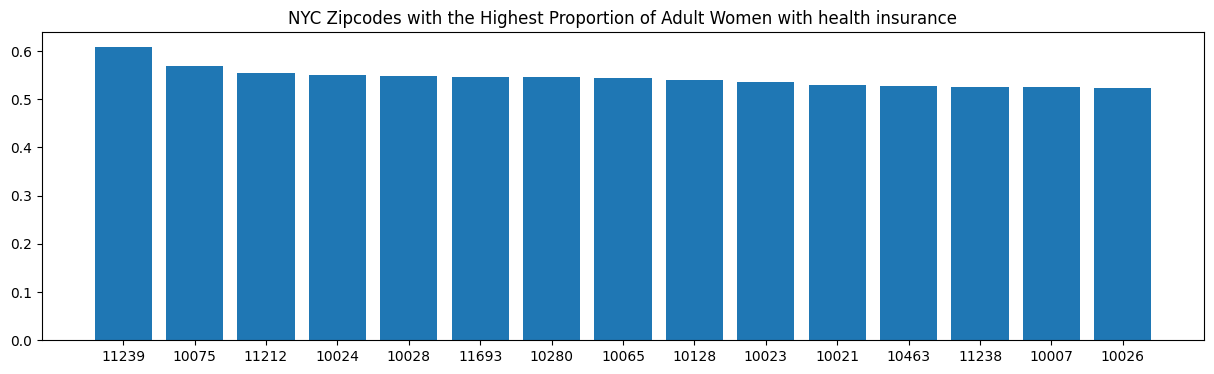

In [158]:
# create a bar graph to illustrate the top 15 NYC zipcodes with the highest proportion of adult insured  women





top15_women_health_ins = tmp.sort_values(by = 'hins_adult_female_health_ins_perc', ascending=False).head(n=15) # sort table so that there's the 15 top zip codes
plt.figure(figsize=(15,4)) # set figure size
plt.bar(x = top15_women_health_ins.zcta5.values, height = top15_women_health_ins.hins_adult_female_health_ins_perc)
plt.title('NYC Zipcodes with the Highest Proportion of Adult Women with health insurance')
plt.show()

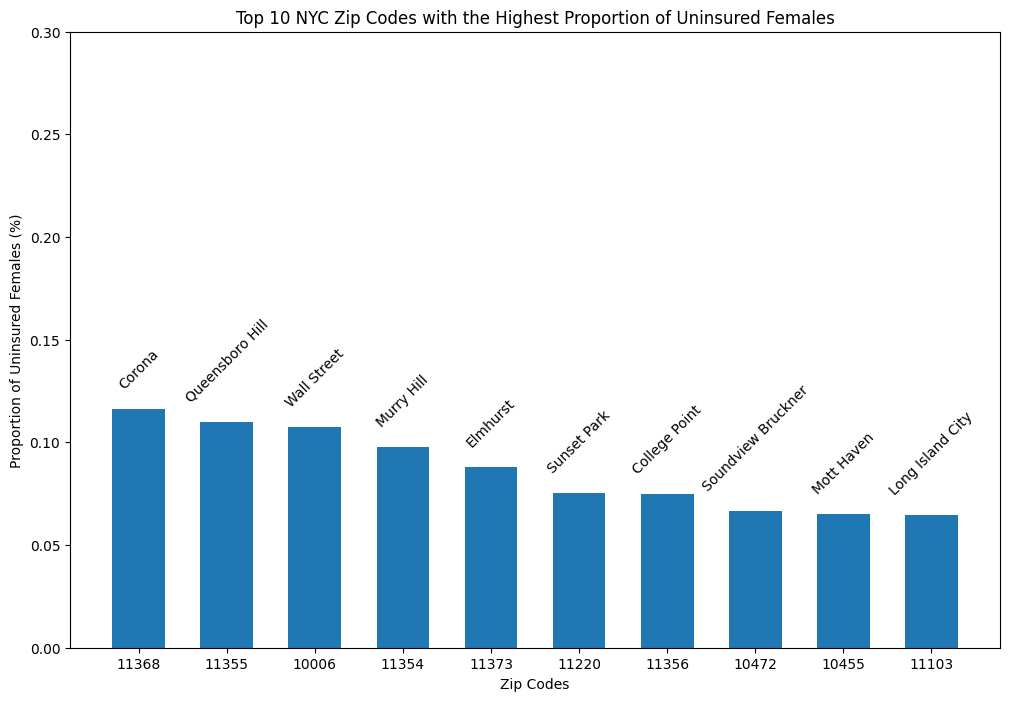

In [204]:
# create a bar graph to illustrate the top 15 nyc zipcodes with the highest proportion of adult non-insured women

# Top 10 zip codes with the highest proportion of adult men with an advanced degree
top10_woman = tmp.sort_values(by='hins_adult_female_no_health_ins_perc', ascending=False).head(n=10)

# Create a bar plot using Matplotlib for the top 10 zip codes with annotated neighborhood names
plt.figure(figsize=(12, 8))  # Adjust figure size for better spacing

# Plotting the bar graph
bars = plt.bar(x=top10_woman['zcta5'], height=top10_woman['hins_adult_female_no_health_ins_perc'],
               width=0.6, align='center')  # Adjust width for better bar separation

plt.title('Top 10 NYC Zip Codes with the Highest Proportion of Uninsured Females')
plt.xlabel('Zip Codes')
plt.ylabel('Proportion of Uninsured Females (%)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually annotate bars with slanted neighborhood names
neighborhood_labels = [
    'Corona',
    'Queensboro Hill',
    'Wall Street',
    'Murry Hill',
    'Elmhurst',
    'Sunset Park',
    'College Point',
    'Soundview Bruckner',
    'Mott Haven',
    'Long Island City'
]

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             neighborhood_labels[i],
             ha='center', color='black', fontsize=10, rotation=45)  # Slant annotations for readability

# Adjust y-axis limits to provide space for annotations
plt.ylim(0, 0.3)  # Increase space for annotations

plt.show()



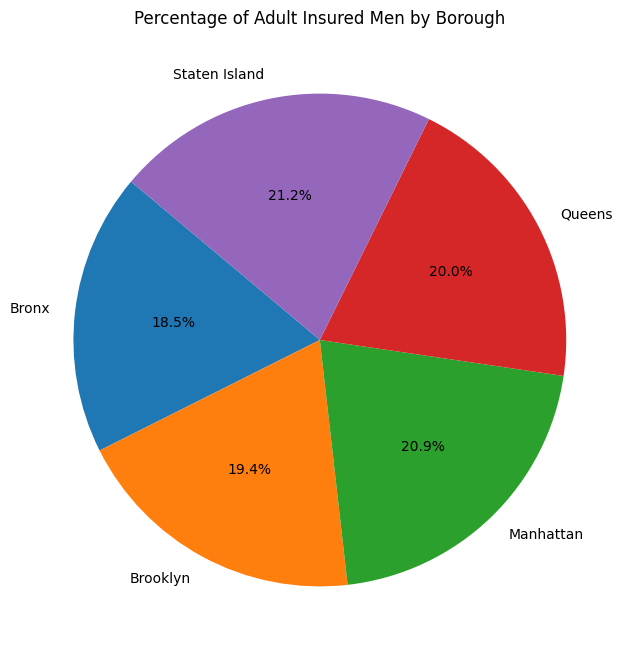

In [160]:
# create a pie chart illustrating the boroughs and their percentages of adult insured men

# Group by 'Borough' and calculate the mean of the percentage for each borough
borough_percentage_male_ins = tmp.groupby('Borough')['hins_adult_male_health_ins_perc'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_percentage_male_ins, labels=borough_percentage_male_ins.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Adult Insured Men by Borough')
plt.show()

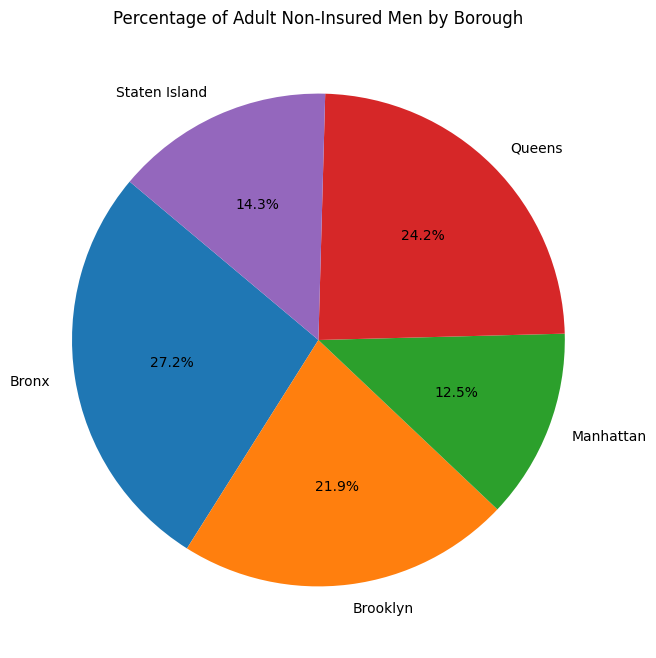

In [161]:
# create a pie chart illustrating the boroughs and their percentages of adult uninsured men

# Group by 'Borough' and calculate the mean of the percentage for each borough
borough_percentage_male_no_ins = tmp.groupby('Borough')['hins_adult_male_no_health_ins_perc'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_percentage_male_no_ins, labels=borough_percentage_male_no_ins.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Adult Non-Insured Men by Borough')
plt.show()

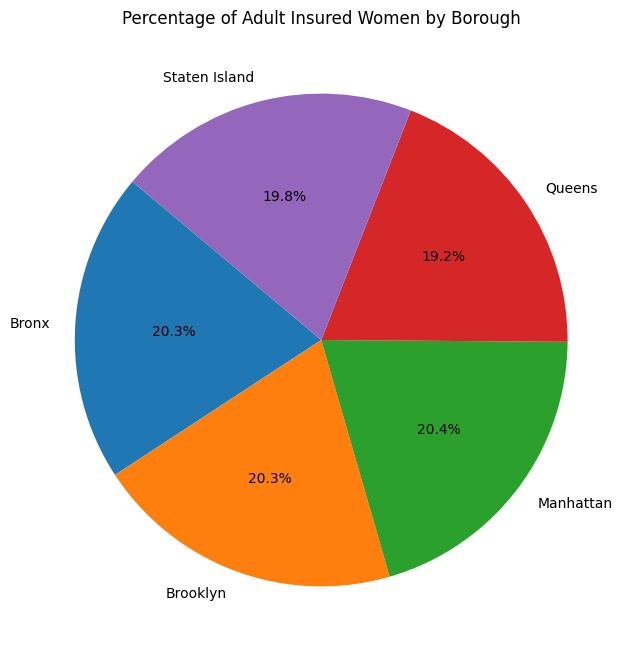

In [162]:
# create a pie chart illustrating the boroughs and their percentages of adult insured women

# Group by 'Borough' and calculate the mean of the percentage for each borough
borough_percentage_female_ins = tmp.groupby('Borough')['hins_adult_female_health_ins_perc'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_percentage_female_ins, labels=borough_percentage_female_ins.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Adult Insured Women by Borough')
plt.show()

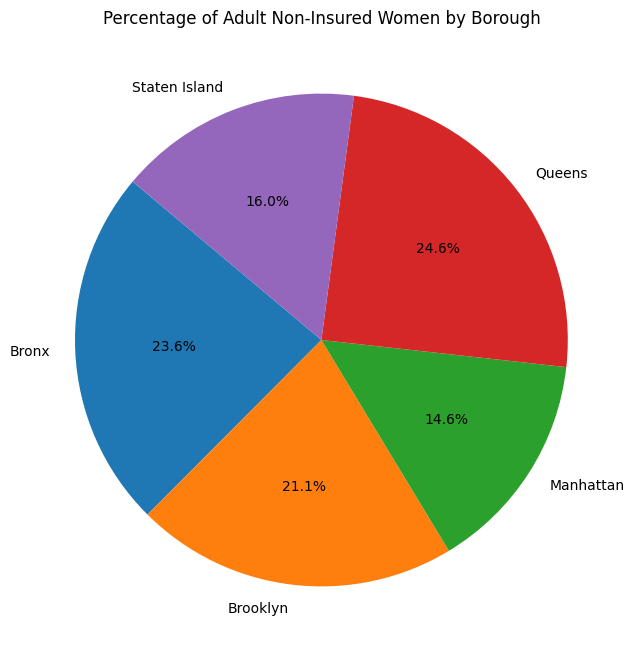

In [163]:
# create a pie chart illustrating the boroughs and their percentages of adult non-insured women

# Group by 'Borough' and calculate the mean of the percentage for each borough
borough_percentage_female_no_ins = tmp.groupby('Borough')['hins_adult_female_no_health_ins_perc'].mean()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_percentage_female_no_ins, labels=borough_percentage_female_no_ins.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Adult Non-Insured Women by Borough')
plt.show()

In [164]:
# SCATTER PLOTS BELOW ....

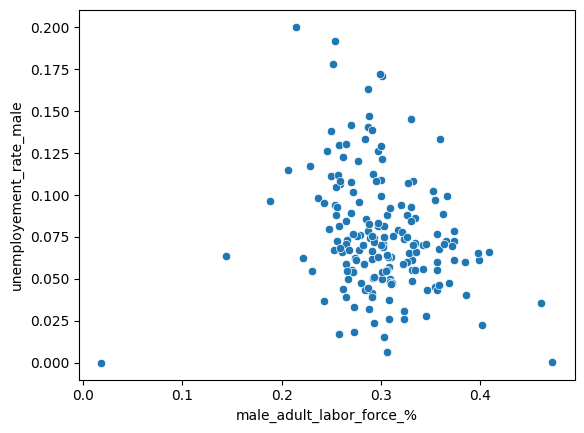

In [165]:
sns.scatterplot(x='male_adult_labor_force_%', y='unemployement_rate_male', data = tmp);

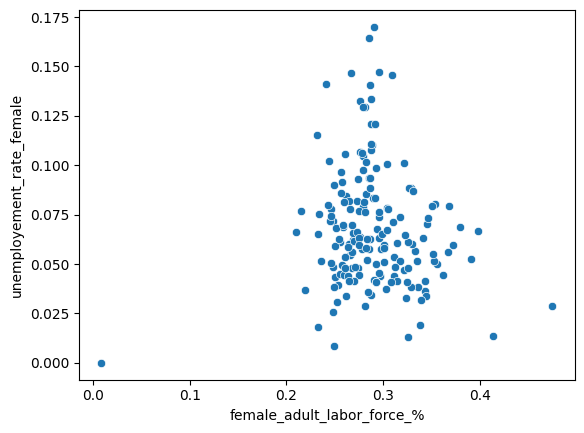

In [166]:
sns.scatterplot(x='female_adult_labor_force_%', y='unemployement_rate_female', data = tmp);

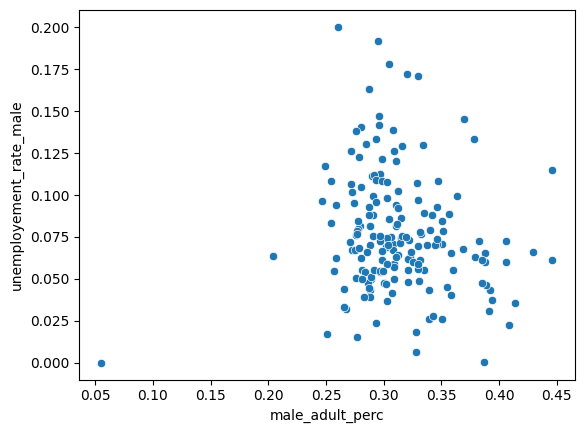

In [167]:
# Scatter plot between concentration of male and male unemployement rate
sns.scatterplot(x='male_adult_perc', y = 'unemployement_rate_male', data = tmp);

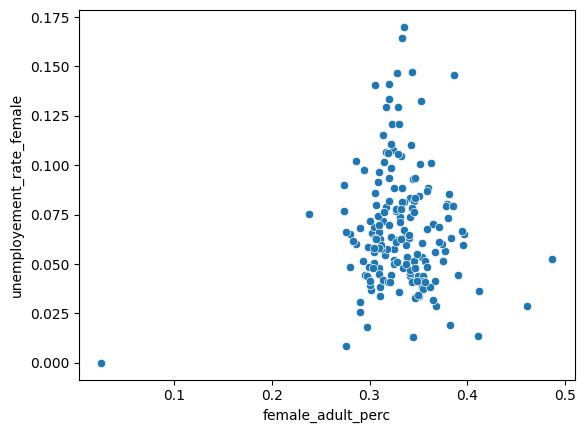

In [168]:
# Scatter plot between concentration of female and female unemployement rate
sns.scatterplot(x='female_adult_perc', y = 'unemployement_rate_female', data = tmp);

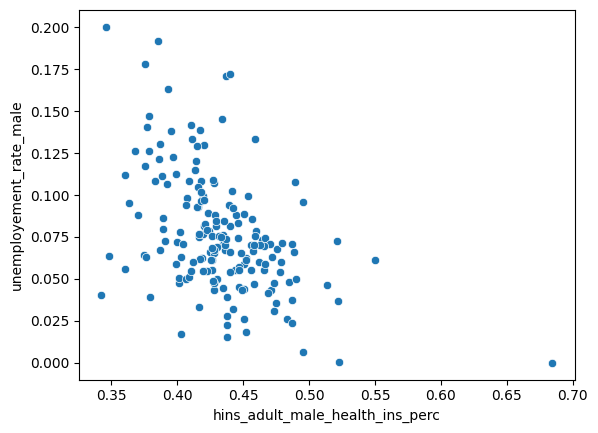

In [169]:
# Scatter plot between insured male percentage and male unemployment rate
sns.scatterplot(x='hins_adult_male_health_ins_perc', y = 'unemployement_rate_male', data = tmp);

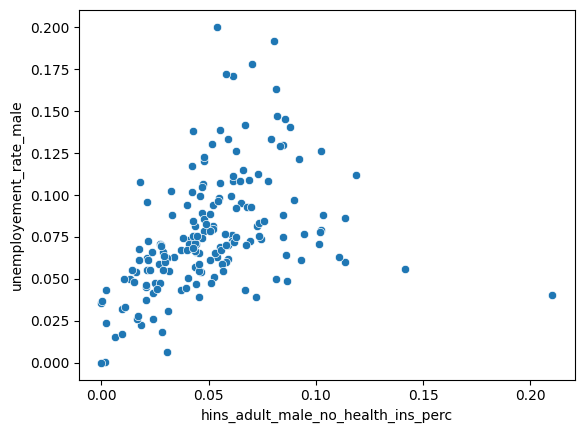

In [170]:
# Scatter plot between uninsured male percentages and  male unemployment rate
sns.scatterplot(x='hins_adult_male_no_health_ins_perc', y = 'unemployement_rate_male', data = tmp);

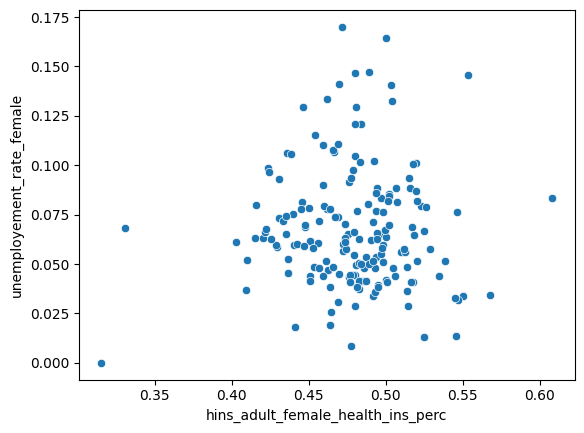

In [171]:
# Scatter plot between insured female percentages and female unemployment rate
sns.scatterplot(x='hins_adult_female_health_ins_perc', y = 'unemployement_rate_female', data = tmp);

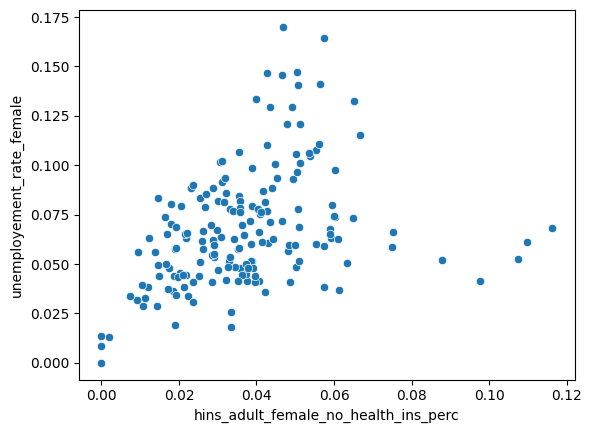

In [172]:
# Scatter plot between uninsured female percentages and female unemployement rate
sns.scatterplot(x='hins_adult_female_no_health_ins_perc', y = 'unemployement_rate_female', data = tmp);

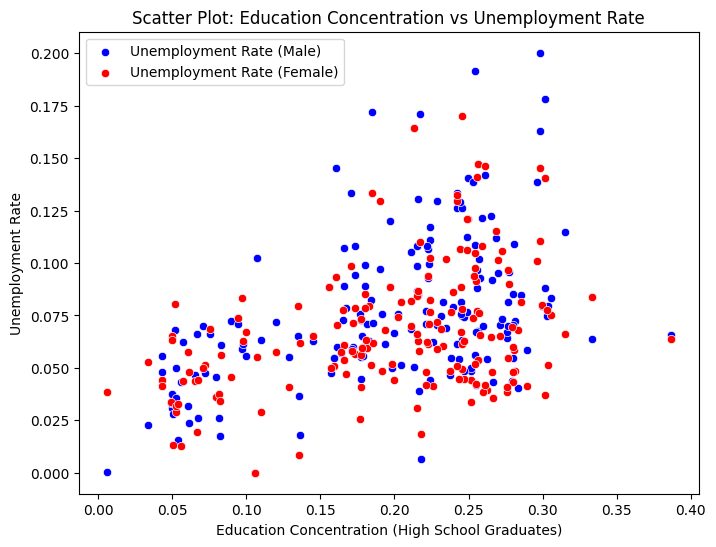

In [173]:
# Scatter plot between adult high school graduate education vs unemployment rate (female vs male)

plt.figure(figsize=(8, 6))

# Scatter plot for Unemployment rate for Male
sns.scatterplot(
    x='educ_adult_high_school_perc',
    y='unemployement_rate_male',
    data=tmp,
    label='Unemployment Rate (Male)',
    color='blue'
)

# Scatter plot for Unemployment rate for Female
sns.scatterplot(
    x='educ_adult_high_school_perc',
    y='unemployement_rate_female',
    data=tmp,
    label='Unemployment Rate (Female)',
    color='red'
)

# Set plot labels and title
plt.xlabel('Education Concentration (High School Graduates)')
plt.ylabel('Unemployment Rate')
plt.title('Scatter Plot: Education Concentration vs Unemployment Rate')
plt.legend()
plt.show()

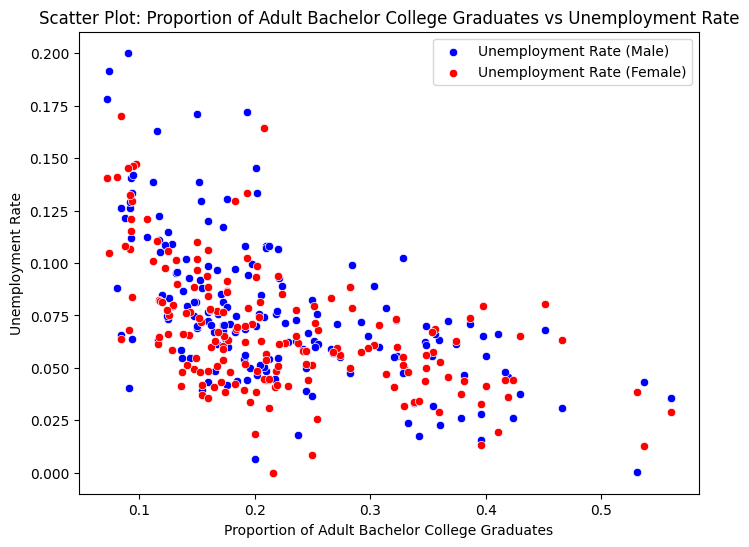

In [174]:
# Scatter plot between adult bachelor degree education vs unemployment rate (female vs male)

plt.figure(figsize=(8, 6))

# Scatter plot for Proportion of Adult Bachelor College Graduates (Male)
sns.scatterplot(
    x='educ_adult_bachelor_perc',
    y='unemployement_rate_male',
    data=tmp,
    label='Unemployment Rate (Male)',
    color='blue'
)

# Scatter plot for Proportion of Adult Bachelor College Graduates (Female)
sns.scatterplot(
    x='educ_adult_bachelor_perc',
    y='unemployement_rate_female',
    data=tmp,
    label='Unemployment Rate (Female)',
    color='red'
)

# Set plot labels and title
plt.xlabel('Proportion of Adult Bachelor College Graduates')
plt.ylabel('Unemployment Rate')
plt.title('Scatter Plot: Proportion of Adult Bachelor College Graduates vs Unemployment Rate')
plt.legend()
plt.show()

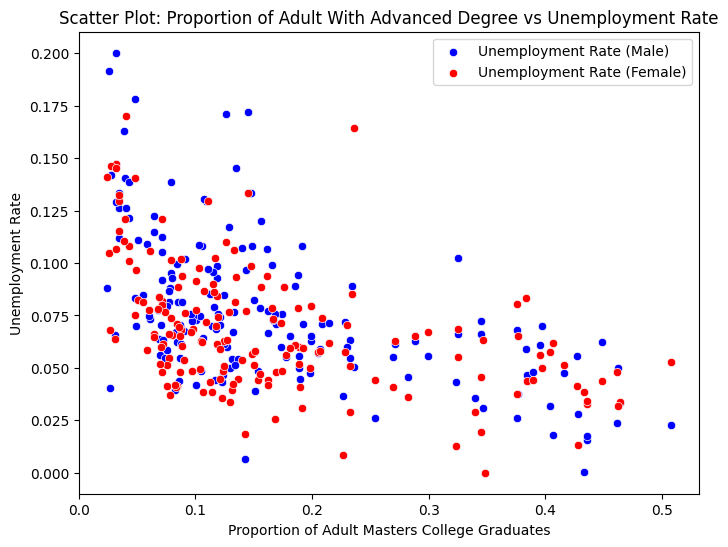

In [175]:
# Scatter plot between adult advanced degree education vs unemployment rate (female vs male)

plt.figure(figsize=(8, 6))

# Scatter plot for Proportion of Adult Masters College Graduates (Male)
sns.scatterplot(
    x='educ_adult_advanced_perc',
    y='unemployement_rate_male',
    data=tmp,
    label='Unemployment Rate (Male)',
    color='blue'
)

# Scatter plot for Proportion of Adult Masters College Graduates (Female)
sns.scatterplot(
    x='educ_adult_advanced_perc',
    y='unemployement_rate_female',
    data=tmp,
    label='Unemployment Rate (Female)',
    color='red'
)

# Set plot labels and title
plt.xlabel('Proportion of Adult Masters College Graduates')
plt.ylabel('Unemployment Rate')
plt.title('Scatter Plot: Proportion of Adult With Advanced Degree vs Unemployment Rate')
plt.legend()
plt.show()

In [176]:
# ex scatter plot
import plotly.express as px

# Example scatter plot for age range 18-19
fig_18_19_male = px.scatter(tmp, x='unemployement_rate_male', y='male_18_19_perc',
                        title='Unemployment Rate vs Proportion of Males (18-19)',
                        labels={'male_18_19_perc': 'Proportion of Males (18-19)', 'unemployement_rate_male': 'Unemployment Rate'})

fig_18_19_male.show()

In [177]:
# ex scatter plot
import plotly.express as px

# Example scatter plot for age range 18-19
fig_18_19_female = px.scatter(tmp, x='unemployement_rate_female', y='female_18_19_perc',
                        title='Unemployment Rate vs Proportion of Females (18-19)',
                        labels={'male_18_19_perc': 'Proportion of Females (18-19)', 'unemployement_rate_female': 'Unemployment Rate'})

fig_18_19_female.show()

In [178]:
import plotly.graph_objs as go
fig = go.Figure()

# Add trace for Proportion of Males (18-19)
fig.add_trace(go.Scatter(
    x=tmp['male_18_19_perc'],  # Independent variable:
    y=tmp['unemployement_rate_male'],  # Dependent variable: Unemployment rate for Male
    mode='markers',
    name='Unemployment Rate (Male)',
    marker=dict(color='blue')
))

# Add trace for Proportion of Females (18-19)
fig.add_trace(go.Scatter(
    x=tmp['female_18_19_perc'],  # Independent variable:
    y=tmp['unemployement_rate_female'],  # Dependent variable: Unemployment rate for Female
    mode='markers',
    name='Unemployment Rate (Female)',
    marker=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Scatter Plot: Proportion of Adults 18-19 vs Unemployment Rate',
    xaxis=dict(title='Proportion of Adults 18-19'),
    yaxis=dict(title='Unemployment Rate'),
    showlegend=True
)

# Show the plot
fig.show()


In [179]:
# ex scatter plot
import plotly.express as px

# Example scatter plot for age range 20
fig_20_female= px.scatter(tmp, x='unemployement_rate_female', y='female_20_perc',
                        title='Unemployment Rate vs Proportion of Females (20)',
                        labels={'female_20_perc': 'Proportion of Females (20)', 'unemployement_rate_female': 'Unemployment Rate'})

fig_20_female.show()